In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
#Load data
well_13 = pd.read_excel('VolveData_Project.xlsx', sheet_name='well 13',index_col=0)
well_14 = pd.read_excel('VolveData_Project.xlsx', sheet_name='well 14')
well_15 = pd.read_excel('VolveData_Project.xlsx', sheet_name='well 15')

In [ ]:
data = pd.concat([well_14, well_15], axis=0)
data['Well'] = data['Well'].astype('category')
data['RT_log'] = np.log10(data.RT) #For Visualization
data

,Depth,Well,GR,RT,RHOB,NPHI,Facies,RT_log
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,SH,-0.230032
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,UN,-0.109691
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,SH,0.029668
3,3180.0,14,44.9124,1.4460,2.2514,0.5482,UN,0.160168
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,UN,-0.020361
...,...,...,...,...,...,...,...,...
1154,4083.5,15,59.7060,1.7590,2.4851,0.1416,CB,0.245266
1155,4084.0,15,58.4170,1.6510,2.4860,0.1416,CB,0.217747
1156,4084.5,15,57.4990,1.5970,2.5311,0.1527,CB,0.203305
1157,4085.0,15,56.7850,1.4820,2.4731,0.1785,CB,0.170848


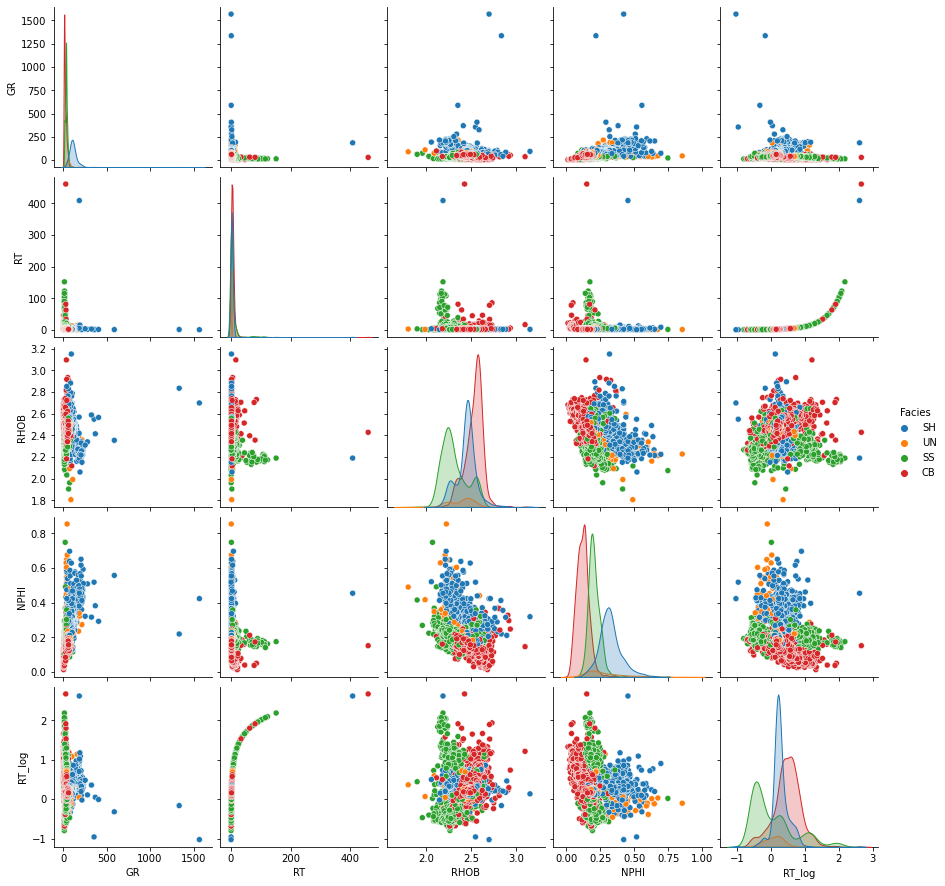

In [ ]:
sns.pairplot(data.drop(["Depth","Well"],axis=1),hue="Facies")

In [ ]:
data.head()

,Depth,Well,GR,RT,RHOB,NPHI,Facies,RT_log
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,SH,-0.230032
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,UN,-0.109691
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,SH,0.029668
3,3180.0,14,44.9124,1.4460,2.2514,0.5482,UN,0.160168
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,UN,-0.020361


In [ ]:
data.Facies.unique()

array(['SH', 'UN', 'SS', 'CB'], dtype=object)

In [ ]:
data.Facies.value_counts()

CB    1249
SS     997
SH     871
UN     124
Name: Facies, dtype: int64

In [ ]:
data["Facies"].replace("SH",1,inplace=True)
data["Facies"].replace("UN",2,inplace=True)
data["Facies"].replace("SS",3,inplace=True)
data["Facies"].replace("CB",4,inplace=True)

In [ ]:
data.head()

,Depth,Well,GR,RT,RHOB,NPHI,Facies,RT_log
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,1,-0.230032
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,2,-0.109691
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,1,0.029668
3,3180.0,14,44.9124,1.4460,2.2514,0.5482,2,0.160168
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,2,-0.020361


In [ ]:
data["Density_porosity"]=(data["RHOB"]-2.71)/(1-2.71)
data.head()

,Depth,Well,GR,RT,RHOB,NPHI,Facies,RT_log,Density_porosity
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,1,-0.230032,0.222456
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,2,-0.109691,0.229825
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,1,0.029668,0.242105
3,3180.0,14,44.9124,1.4460,2.2514,0.5482,2,0.160168,0.268187
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,2,-0.020361,0.255380


In [ ]:
Well_14=data[data.Well==14]

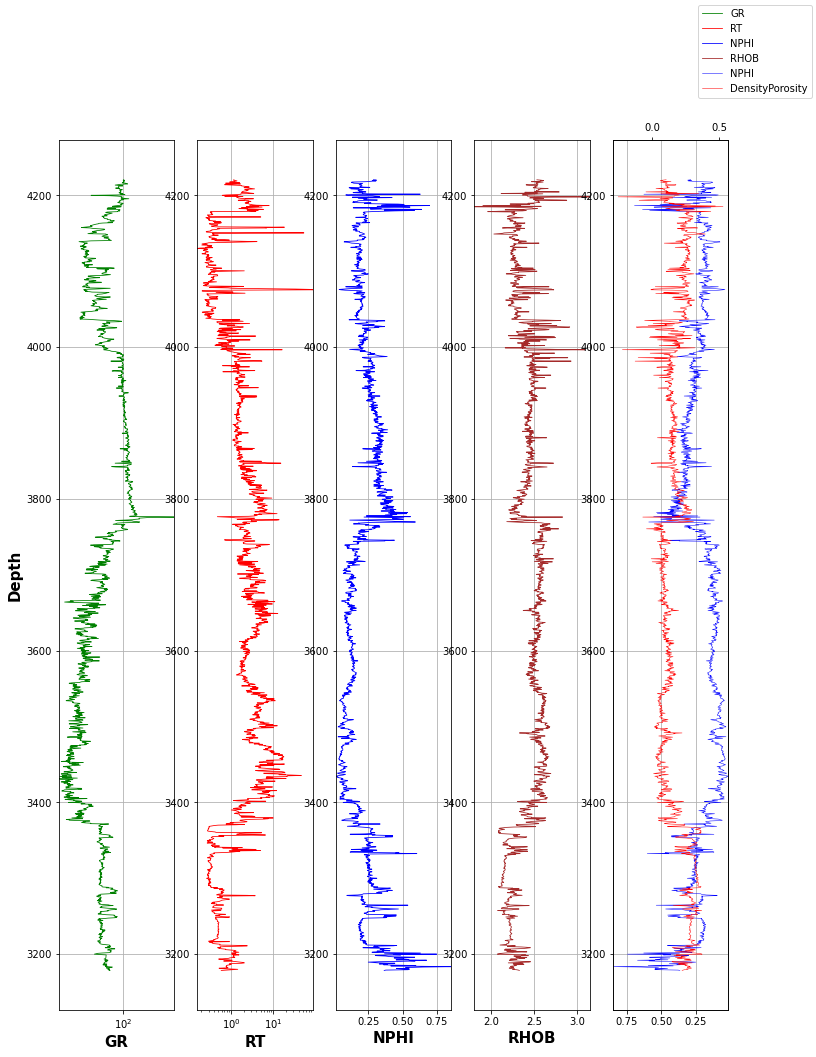

In [ ]:
Logs=["GR",'RT','NPHI','RHOB']
facies = ['SH', 'UN', 'SS', 'CB']
colors = ['green', 'red','blue','brown']
fig,ax=plt.subplots(1,5,figsize=(12,16))
ax[0].set_ylabel("Depth",fontweight="bold",fontsize=15)

for i in range(len(Logs)):
    if Logs[i]=="RT" or Logs[i]=="GR":
        ax[i].semilogx(Well_14[Logs[i]],Well_14.Depth,label=Logs[i],color=colors[i],lw=0.8)
    else:
        ax[i].plot(Well_14[Logs[i]],Well_14.Depth,label=Logs[i],color=colors[i],lw=0.8)
    ax[i].set_xlabel(Logs[i],fontweight="bold",fontsize=15)
    ax[i].set_xlim(Well_14[Logs[i]].min(),Well_14[Logs[i]].max())
    ax[i].grid(True)
    
ax[4].plot(Well_14.NPHI,Well_14.Depth,color="blue",lw=0.5,label="NPHI")
ax[4].set_xlim(Well_14.NPHI.max(),Well_14.NPHI.min())
ax2=ax[4].twiny()
ax2.plot(Well_14.Density_porosity,well_14.Depth,color="red",lw=0.5,label="DensityPorosity")
fig.legend()
ax[4].grid()

In [ ]:
data.columns

Index(['Depth', 'Well', 'GR', 'RT', 'RHOB', 'NPHI', 'Facies', 'RT_log',
       'Density_porosity'],
      dtype='object')

In [ ]:
data.head()
x=data.drop(['Depth','Well','Facies','RT_log','Density_porosity','Facies'],axis=1)
y=data["Facies"]

In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape
x_test.shape

(973, 4)

array([[<AxesSubplot:title={'center':'GR'}>,
        <AxesSubplot:title={'center':'RT'}>],
       [<AxesSubplot:title={'center':'RHOB'}>,
        <AxesSubplot:title={'center':'NPHI'}>]], dtype=object)

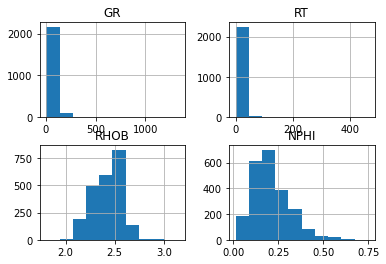

In [ ]:
x_train.hist()

In [ ]:
data.head()

,Depth,Well,GR,RT,RHOB,NPHI,Facies,RT_log,Density_porosity
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,1,-0.230032,0.222456
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,2,-0.109691,0.229825
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,1,0.029668,0.242105
3,3180.0,14,44.9124,1.4460,2.2514,0.5482,2,0.160168,0.268187
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,2,-0.020361,0.255380


In [ ]:
data.describe()

,Depth,GR,RT,RHOB,NPHI,Facies,RT_log,Density_porosity
count,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000,3241.000000
mean,3733.609380,51.379917,4.292569,2.432688,0.207456,2.809627,0.278370,0.162171
std,265.253354,57.700965,14.524740,0.147662,0.104241,1.209471,0.487116,0.086352
min,3178.500000,3.655000,0.094000,1.805100,0.013500,1.000000,-1.026872,-0.256901
25%,3542.000000,17.433000,1.014000,2.311000,0.133600,1.000000,0.006038,0.093567
50%,3747.500000,34.083600,1.864900,2.459000,0.187900,3.000000,0.270656,0.146784
75%,3950.500000,71.846000,3.697700,2.550000,0.267500,4.000000,0.567932,0.233333
max,4220.500000,1567.590000,461.170000,3.149300,0.853200,4.000000,2.663861,0.529181


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[-0.35556817, -0.28781206, -2.00607592,  0.67982728],
       [-0.04526917, -0.28360391, -1.04441078,  0.07710735],
       [-0.36040237, -0.23443505,  0.43568836, -0.79673901],
       ...,
       [-0.32174002, -0.24905282, -0.53928702,  0.01176393],
       [ 0.46490226, -0.16968866,  0.77909266,  0.27216235],
       [-0.54906004,  2.43567054, -1.43706298, -0.23888173]])

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[4 4]
 [4 4]
 [4 4]
 ...
 [1 1]
 [4 3]
 [3 3]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[267   0   3   2]
 [ 12   1  15   7]
 [  3   0 208  57]
 [  5   0  55 338]]


0.8365878725590956

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_k = classifier.predict(x_test)
print(np.concatenate((y_pred_k.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[4 4]
 [4 4]
 [4 4]
 ...
 [1 1]
 [3 3]
 [3 3]]


[[262   3   6   1]
 [ 13  15   5   2]
 [  3   8 221  36]
 [  1   7  54 336]]


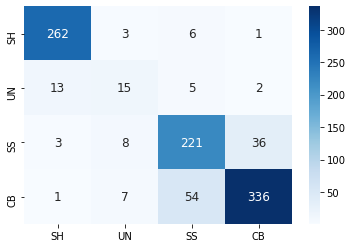

0.8571428571428571

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_k)
print(cm)
names = ['SH', 'UN', 'SS', 'CB']

cf=sns.heatmap(cm, annot=True, annot_kws={"size": 12},cmap='Blues',fmt="d",xticklabels=names,yticklabels=names)
plt.show()
accuracy_score(y_test, y_pred_k)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='sigmoid', random_state=0)

In [ ]:
y_pred_svm = classifier.predict(x_test)
print(np.concatenate((y_pred_svm.reshape(len(y_pred_svm),1), y_test.values.reshape(len(y_test),1)),1))

[[4 4]
 [4 4]
 [3 4]
 ...
 [1 1]
 [4 3]
 [3 3]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)
accuracy_score(y_test, y_pred_svm)

[[246  11  12   3]
 [ 11   1  15   8]
 [  8   2 188  70]
 [  2   4  78 314]]


0.7697841726618705

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred_rbf = classifier.predict(x_test)
print(np.concatenate((y_pred_rbf.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[4 4]
 [4 4]
 [4 4]
 ...
 [1 1]
 [3 3]
 [3 3]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_rbf)
print(cm)
accuracy_score(y_test, y_pred_rbf)

[[268   0   2   2]
 [ 13   4  15   3]
 [  4   2 216  46]
 [  3   0  54 341]]


0.8520041109969168

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred_bayes = classifier.predict(x_test)
print(np.concatenate((y_pred_bayes.reshape(len(y_pred_bayes),1), y_test.values.reshape(len(y_test),1)),1))

[[4 4]
 [4 4]
 [4 4]
 ...
 [1 1]
 [4 3]
 [3 3]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_bayes)
print(cm)
accuracy_score(y_test, y_pred_bayes)

[[263   5   1   3]
 [ 24   6   2   3]
 [ 15   5 195  53]
 [ 19   4  52 323]]


0.8088386433710175

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_best = RandomForestClassifier(n_estimators=10,criterion="entropy",random_state = 0)
classifier_best.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred_forest = classifier_best.predict(x_test)
print(np.concatenate((y_pred_forest.reshape(len(y_pred_bayes),1), y_test.values.reshape(len(y_test),1)),1))

[[4 4]
 [4 4]
 [4 4]
 ...
 [1 1]
 [3 3]
 [3 3]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_forest)
print(cm)
accuracy_score(y_test, y_pred_forest)

[[264   3   3   2]
 [ 13  11   9   2]
 [  0   7 229  32]
 [  3   1  56 338]]


0.8653648509763617

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred_ensemble = classifier.predict(x_test)
print(np.concatenate((y_pred_ensemble.reshape(len(y_pred_ensemble),1), y_test.values.reshape(len(y_test),1)),1))

[[4 4]
 [4 4]
 [4 4]
 ...
 [1 1]
 [1 3]
 [3 3]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_ensemble)
print(cm)
accuracy_score(y_test, y_pred_ensemble)

[[252   6   5   9]
 [ 12  14   8   1]
 [  4   8 207  49]
 [  2   7  52 337]]


0.8324768756423433

In [ ]:
well_13.head()

,Well,GR,RT,RHOB,NPHI
Depth,,,,,
4175.5,13,20.6032,4.1812,2.6117,0.0770
4176.0,13,21.4990,4.5516,2.6131,0.0798
4176.5,13,22.4472,4.4804,2.6334,0.0801
4177.0,13,29.6713,4.3859,2.6328,0.1005
4177.5,13,34.7014,4.8566,2.6183,0.1001


In [ ]:
well_13.head()

,Well,GR,RT,RHOB,NPHI
Depth,,,,,
4175.5,13,20.6032,4.1812,2.6117,0.0770
4176.0,13,21.4990,4.5516,2.6131,0.0798
4176.5,13,22.4472,4.4804,2.6334,0.0801
4177.0,13,29.6713,4.3859,2.6328,0.1005
4177.5,13,34.7014,4.8566,2.6183,0.1001


In [ ]:
well_13.columns

Index(['Well', 'GR', 'RT', 'RHOB', 'NPHI'], dtype='object')

In [ ]:
Well_13_x_sc=sc.transform(well_13.drop("Well",axis=1))


In [ ]:
Well_13_x_sc

array([[-5.67053179e-01, -6.09780141e-04,  1.22232379e+00,
        -1.28827759e+00],
       [-5.50242322e-01,  2.67357865e-02,  1.23164096e+00,
        -1.26096989e+00],
       [-5.32448110e-01,  2.14792953e-02,  1.36673994e+00,
        -1.25804406e+00],
       ...,
       [ 3.14437767e-01, -2.10433848e-01,  4.98912023e-01,
        -3.77370777e-01],
       [ 2.67034077e-01, -2.11209033e-01,  3.82447387e-01,
        -3.28607029e-01],
       [ 1.08404365e-01, -2.11341922e-01,  2.50675970e-01,
        -3.56890002e-01]])

In [ ]:
well_13["facies_pred"]=classifier_best.predict(Well_13_x_sc)

In [ ]:
well_13["facies_pred"].replace(1,"SH",inplace=True)
well_13["facies_pred"].replace(2,"UN",inplace=True)
well_13["facies_pred"].replace(3,"SS",inplace=True)
well_13["facies_pred"].replace(4,"CB",inplace=True)

In [ ]:
submission=pd.read_excel('VolveData_Project.xlsx', sheet_name='well 13',index_col=0)
submission=well_13

In [ ]:
pd.DataFrame(well_13,columns=well_13.columns).to_csv("logistic_facies_pred1.csv")

In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)